In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

This ipython notebook will illustrate the matching methodology we will use to match patients in the SEER-Medicare linked database. The comparison between patient outcomes between those patients who receive proton beam therapy vs traditional radiation therapy requires as a first step a matching of the two different groups. One method to perform this matching is to use Propensity Score Matching. Here we are going to illustrate a more direct method of matching using KDTrees, a data structure that allows for efficient finding of nearest neighbors in high-dimenional space. 

In [2]:
import seerhelp

In [3]:
breastfiles = seerhelp.get_breastfiles()
breastfiles

['SEER_1973_2013_TEXTDATA\\incidence\\yr1973_2013.seer9\\BREAST.TXT',
 'inSEER_1973_2013_TEXTDATA\\incidence\\yr1992_2013.sj_la_rg_ak\\BREAST.TXT',
 'SEER_1973_2013_TEXTDATA\\incidence\\yr2000_2013.ca_ky_lo_nj_ga\\BREAST.TXT',
 'SEER_1973_2013_TEXTDATA\\incidence\\yr2005.lo_2nd_half\\BREAST.txt']

In [4]:

dfbreast0 = seerhelp.make_clean_dataframe(breastfiles[0])

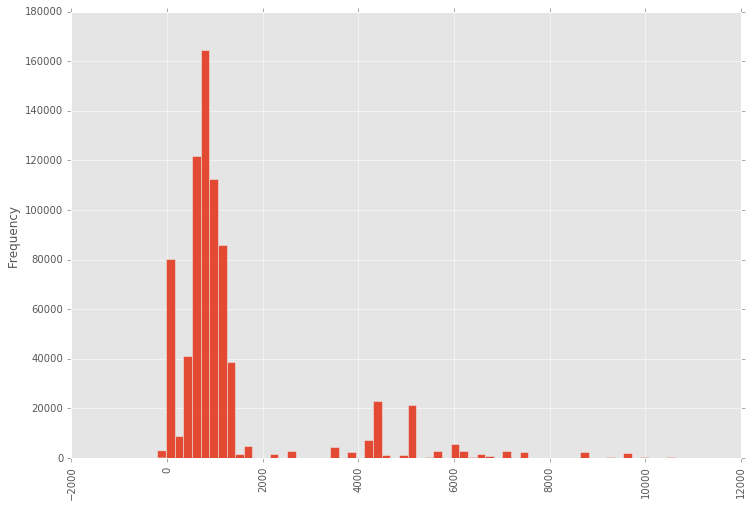

In [6]:
dfbreast0['elevation'].plot(kind='hist',bins=60,rot=90,figsize=((12,8)));

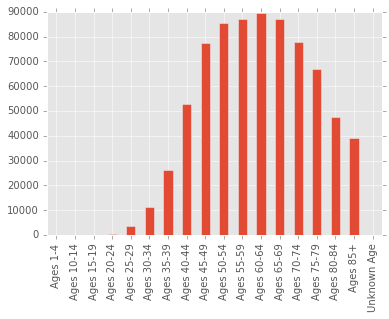

In [7]:
dfbreast0['AGE_1REC'].value_counts().sort_index().plot(kind='bar',rot=90);

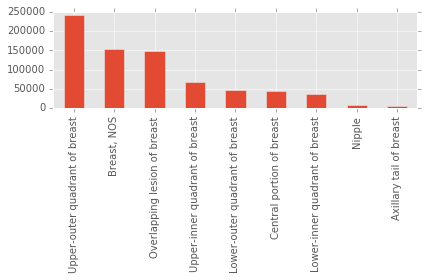

In [9]:
dfbreast0['PRIMSITE'].value_counts().plot(kind='bar',rot=90);
plt.tight_layout()

## One-Hot Encode the categorical variables we wish to include 

In order to find the neighbors in the high-dimensional feature space, we need to first do some preprocessing on the data.
The first step is to "one-hot encode" the categorical features.